# *Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.* (5 marks)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from scipy import stats
from sklearn import metrics
from IPython.display import display

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [ ]:
#Import the dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#statistical summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.shape

(5000, 14)

In [ ]:
#null values - see insights for incorrect imputation
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Insights:** *Dataset contains 5,000 records and 14 columns. No Null values. "Experience" has a minumum value that is negative. This may be an error, however, I will be dropping this column later due to high correlation with "Age" (See Below).  Looks like we have some Categorical values entered as Intergers. "Mortgage" has a lot of 0's. This will be investigated further.*

# *EDA: Study the data distribution in each attribute and target variable, share your findings*(20 marks)

In [ ]:
#Number of unique in each column
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

**Insights:** *Integer values with low number of unique values are confirmed as categorical*

In [ ]:
#Number of people with zero mortgage
print('Number of people with zero mortgage = ' + str(len(df[df['Mortgage'] == 0])))
print()
print(df['Mortgage'].value_counts())
print()
print(df['Mortgage'].value_counts(normalize=True))

Number of people with zero mortgage = 3462

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64


**Insights:** *3,462 people - 69% of "Mortgage" values are 0. What does this mean? Does this indicate NULL or missing values? I will not make that assumption. Instead, I will interpret this at face value. Many people don't have mortgages. Many people rent. Others may have a mortgage at another bank. This isn't necessarily indicative of NULL or missing values. I will leave these values alone. In a previous test, I imputed these with Mean and Median. This did not have any signigicant effect on the model.*

In [ ]:
#Number of people with zero credit card spending per month?
print('Number of people with zero credit card spending per month = ' + str(len(df[df['CCAvg'] == 0])))

Number of people with zero credit card spending per month = 106


In [ ]:
# graphical correlation
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.xticks(rotation=90)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

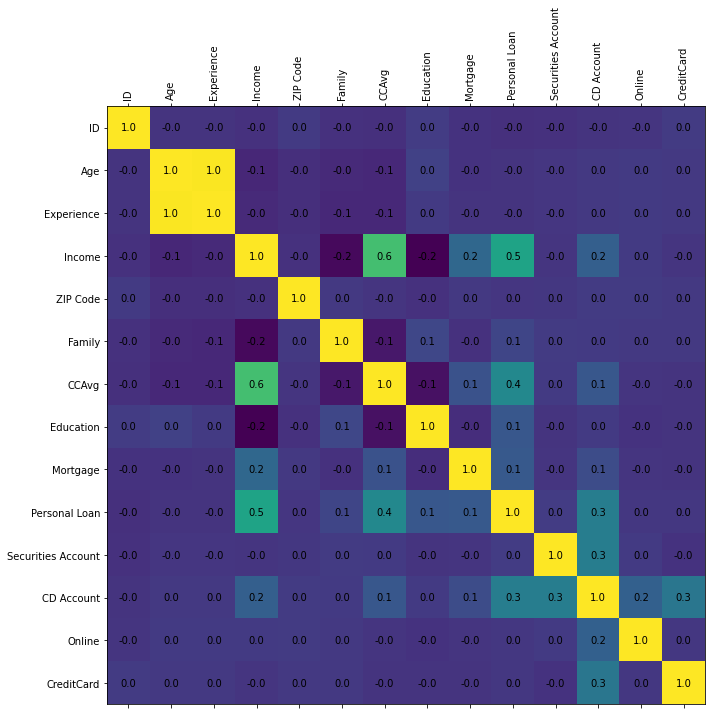

In [ ]:
plot_corr(df)

**Insights:** *Age" and "Experience" are highly correlated. "Income", "CCAvg" and "CD Account" have correlation with our Y variable "Personal Loan*

In [ ]:
rev_df = df.drop('ID', axis =1 ) # dropping this column. it is not needed.

Univariate and Bivariate


************ Family ************
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64



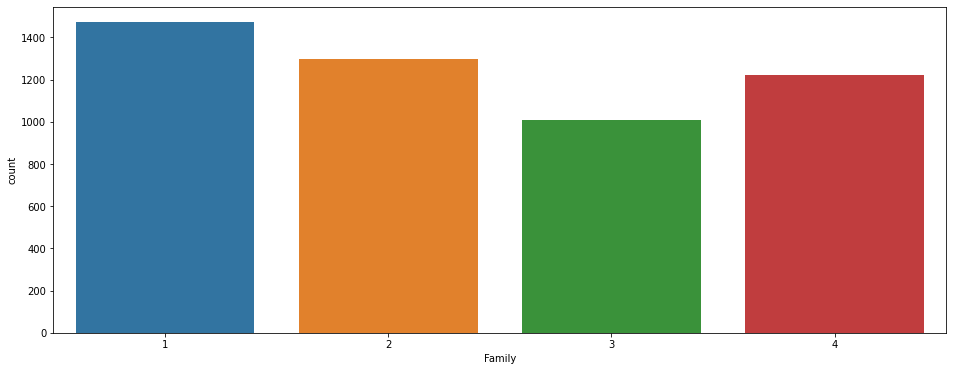


************ Education ************
Undergrad                2096
Advanced/Professional    1501
Graduate                 1403
Name: Education, dtype: int64

Undergrad                0.4192
Advanced/Professional    0.3002
Graduate                 0.2806
Name: Education, dtype: float64



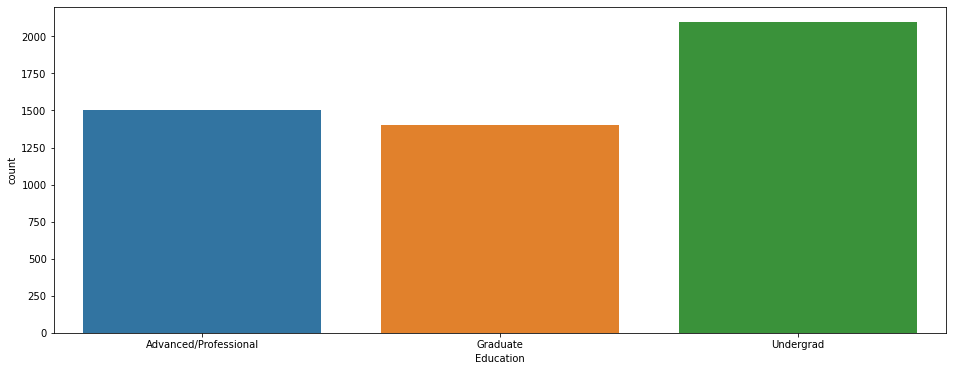


************ Personal Loan ************
0    4520
1     480
Name: Personal Loan, dtype: int64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64



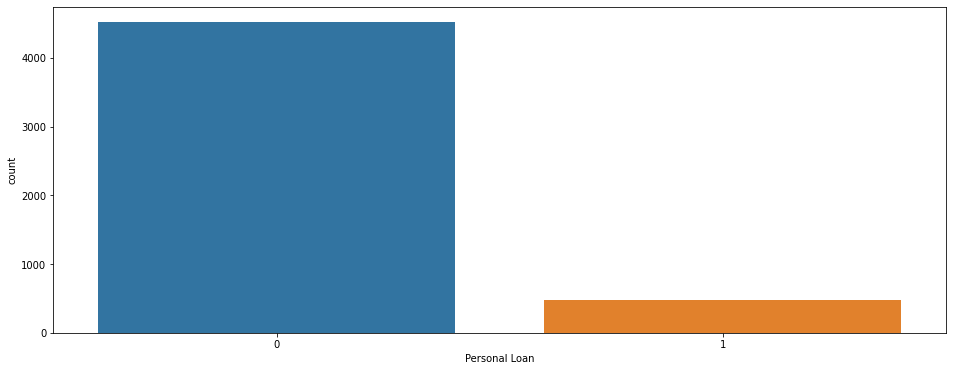


************ Securities Account ************
0    4478
1     522
Name: Securities Account, dtype: int64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64



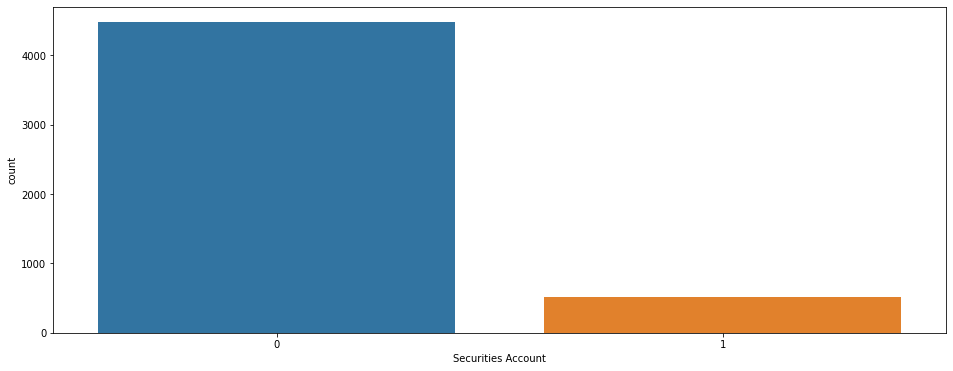


************ CD Account ************
0    4698
1     302
Name: CD Account, dtype: int64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64



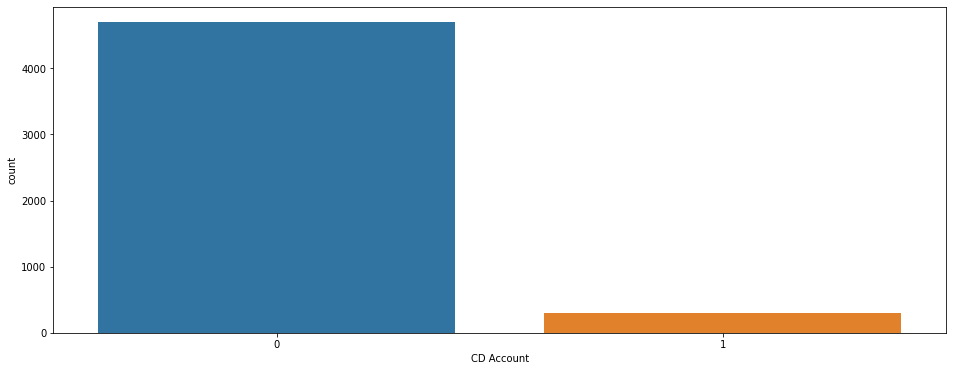


************ Online ************
1    2984
0    2016
Name: Online, dtype: int64

1    0.5968
0    0.4032
Name: Online, dtype: float64



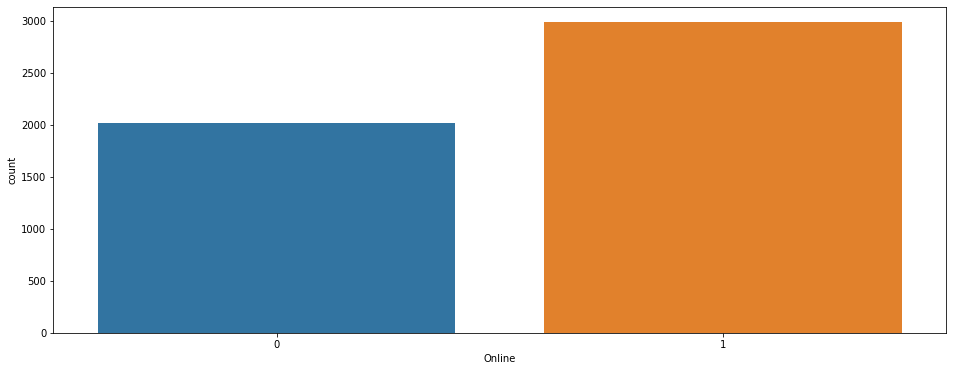


************ CreditCard ************
0    3530
1    1470
Name: CreditCard, dtype: int64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



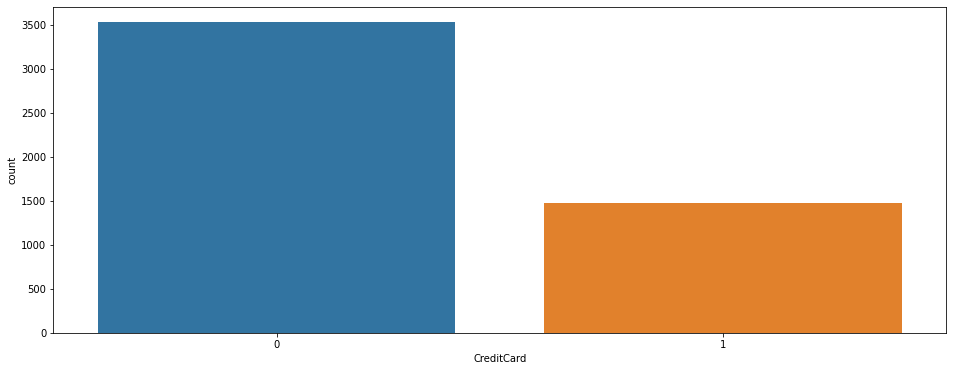

In [ ]:
#Value counts of all categorical columns
rev_df['Education'] = rev_df['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}).astype('category')
rev_df['Family'] = rev_df['Family'].astype('category')
rev_df['Personal Loan'] = rev_df['Personal Loan'].astype('category')
rev_df['Securities Account'] = rev_df['Securities Account'].astype('category')
rev_df['CD Account'] = rev_df['CD Account'].astype('category')
rev_df['Online'] = rev_df['Online'].astype('category')
rev_df['CreditCard'] = rev_df['CreditCard'].astype('category')

for column in rev_df.select_dtypes(include='category'):
    print()
    print('************ ' + str(column) + ' ************')
    print(rev_df[column].value_counts())
    print()
    print(rev_df[column].value_counts(normalize=True))
    print()
    plt.figure(figsize=(16, 6))
    sns.countplot(rev_df[column])
    plt.show()

**Insights:** *There is a high imbalance with Personal Loan, Securities Account and CD Account. This may need to be treated*


************ Age ************



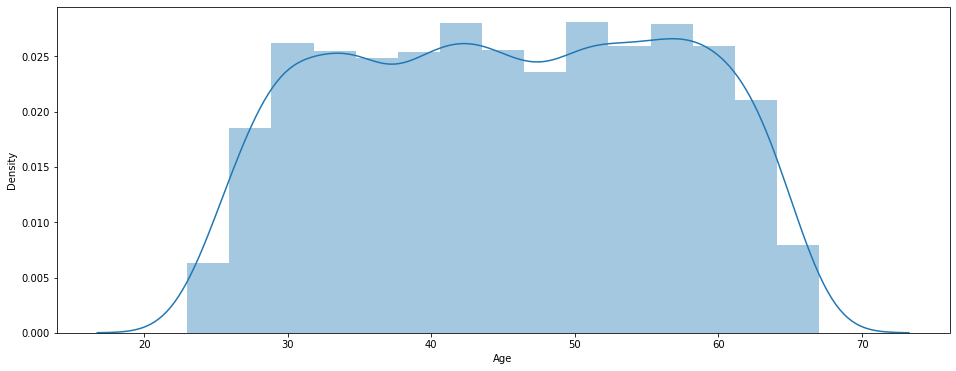

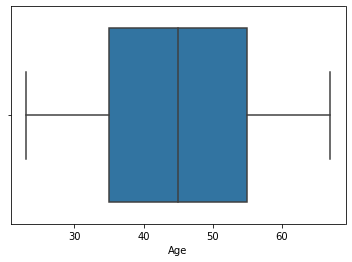


************ Experience ************



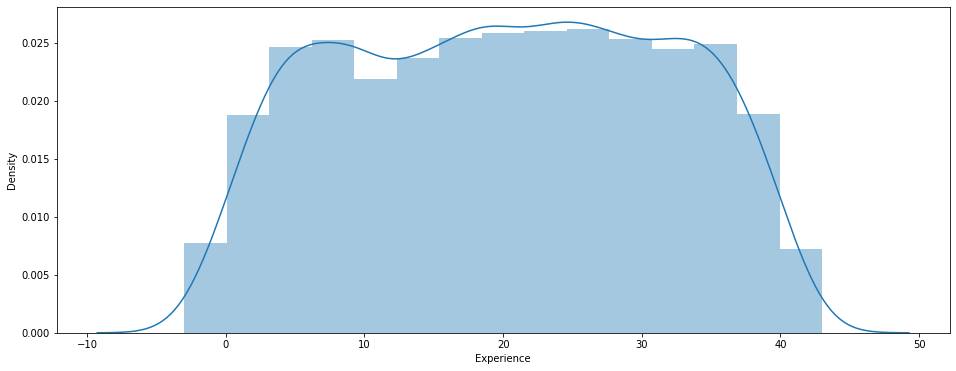

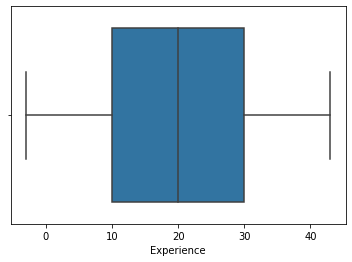


************ Income ************



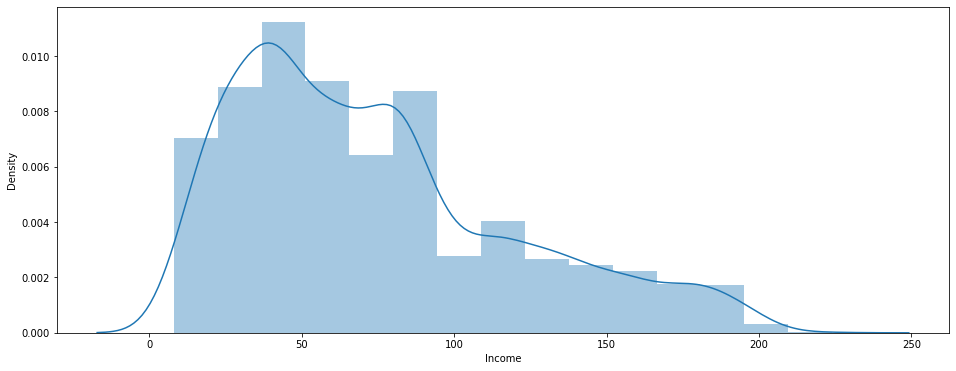

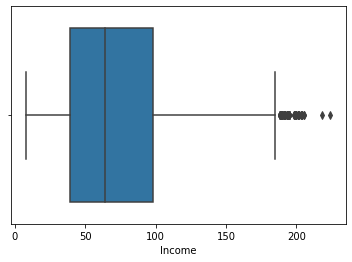


************ CCAvg ************



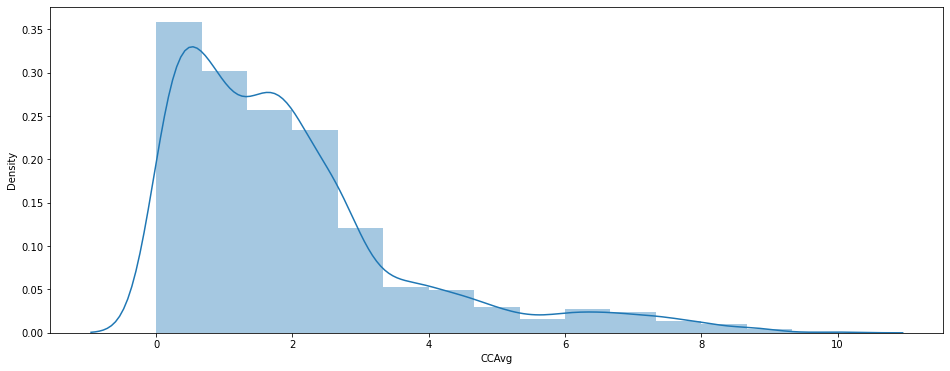

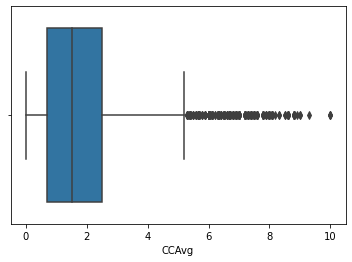


************ Mortgage ************



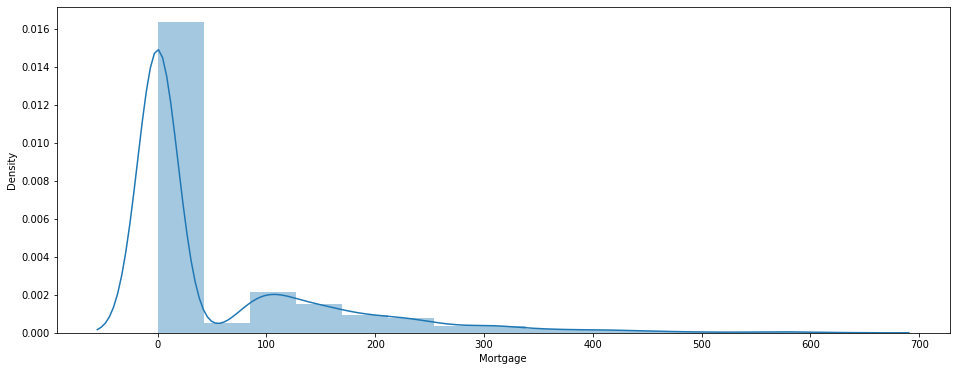

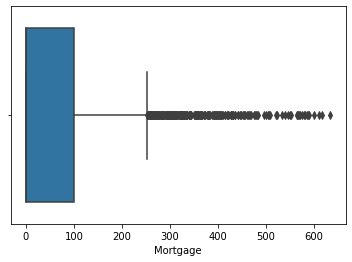

In [ ]:
# distplot and boxplot for continous columns
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    print()
    print('************ ' + str(i) + ' ************')
    print()
    plt.figure(figsize=(16, 6))
    sns.distplot(rev_df[i], bins=15)
    plt.show()
    sns.boxplot(rev_df[i])
    plt.show()

**Insights:** *Age is normally distributed. Income is right skewed as expected. Mortgage is heavily right skewed - but I don't think this is a sign of error because the dataset is large and many people don't have a mortgage - hence the many 0 entries*

In [ ]:
rev_df.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
Personal Loan,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,1.729009,51.789381
1,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


**Insights:** *As Income, CCAvg and Mortgage values increase - so does the likelihood of a liability customer buying personal loan*

In [ ]:
rev_df.groupby(["Personal Loan"]).median()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
Personal Loan,,,,,,
0,45.0,20.0,59.0,93437.0,1.4,0.0
1,45.0,20.0,142.5,93407.0,3.8,0.0


In [ ]:
for column in rev_df.select_dtypes(include='category'):
    print()
    print(pd.crosstab(rev_df[column],rev_df['Personal Loan'],normalize='columns'))
    print('*******************')


Personal Loan         0         1
Family                           
1              0.301991  0.222917
2              0.263274  0.220833
3              0.194027  0.277083
4              0.240708  0.279167
*******************

Personal Loan                 0         1
Education                                
Advanced/Professional  0.286726  0.427083
Graduate               0.270133  0.379167
Undergrad              0.443142  0.193750
*******************

Personal Loan    0    1
Personal Loan          
0              1.0  0.0
1              0.0  1.0
*******************

Personal Loan              0      1
Securities Account                 
0                   0.897788  0.875
1                   0.102212  0.125
*******************

Personal Loan         0         1
CD Account                       
0              0.964159  0.708333
1              0.035841  0.291667
*******************

Personal Loan         0        1
Online                          
0              0.404204  0.39375
1    

In [ ]:
pd.crosstab(rev_df[column],rev_df['ZIP Code'],normalize='columns').T

CreditCard,0,1
ZIP Code,,
9307,0.000000,1.000000
90005,0.800000,0.200000
90007,0.666667,0.333333
90009,0.875000,0.125000
90011,1.000000,0.000000
...,...,...
96091,1.000000,0.000000
96094,1.000000,0.000000
96145,0.000000,1.000000


**Insights:** *Zip Code has a 4 entry value. Assuming this is a US Zip Code, this would be an error. I'm leaving as is because it's still a representation of a general geographic reagion*

Get data model ready

In [ ]:
rev_df

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,45,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,39,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,45,91330,4,1.0,Graduate,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,Advanced/Professional,0,0,0,0,1,0
4996,30,15,92037,4,0.4,Undergrad,85,0,0,0,1,0
4997,63,24,93023,2,0.3,Advanced/Professional,0,0,0,0,0,0
4998,65,49,90034,3,0.5,Graduate,0,0,0,0,1,0


In [ ]:
# drop Experience column due to high correlation with Age
#rev_df = rev_df.drop(['Experience'], axis = 1) 
rev_df = rev_df.drop(['ZIP Code'], axis = 1) 

In [ ]:
## Define X and Y variables
X = rev_df.drop('Personal Loan', axis=1)
Y = rev_df['Personal Loan'].astype('category') 
Y = rev_df['Personal Loan'].astype('category') 


In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
## Applying MinMax Scaler due to imbalances in some of our categorical features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# *Split the data into training and test set in the ratio of 70:30 respectively* (5 marks)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [ ]:
X_test

array([[0.43181818, 0.12037037, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.65909091, 0.33796296, 0.18      , ..., 0.        , 0.        ,
        0.        ],
       [0.79545455, 0.28703704, 0.14      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90909091, 0.13888889, 0.01      , ..., 0.        , 1.        ,
        1.        ],
       [0.77272727, 0.14351852, 0.07      , ..., 0.        , 1.        ,
        0.        ],
       [0.79545455, 0.15277778, 0.02      , ..., 0.        , 1.        ,
        0.        ]])

# *Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix* (15 marks)

In [ ]:
logreg = LogisticRegression(random_state=4294967295,fit_intercept=False)
logreg.fit(X_train, y_train) 
y_predict = logreg.predict(X_test) 

In [ ]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9254285714285714

Testing accuracy 0.9346666666666666

Recall: 0.5507246376811594

Precision: 0.6785714285714286

F1 Score: 0.608

Roc Auc Score: 0.9136021196450234

Confusion Matrix


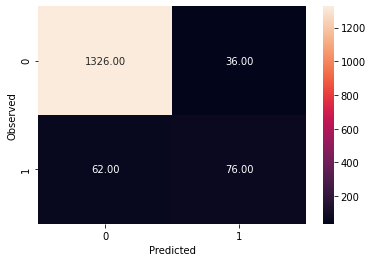

None


In [ ]:
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1] ))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

**Insights:** *Even with MinMax Scaling, too many FALSE NEGATIVES are slipping through the cracks. As this is to be used for directing marketing resources to an identified group, the concern is wasting marketing resources. Therefore, unlike a cancer diagnosis or terrorist identification, each Confusion Matrix Metric has equal weight (although FALSE NEGATIVES would be SLIGHTLY the most important). Each one should be improved to avoid wasting marketing resources to a group that is not receptive to Personal Loans - or missing a group that is receptive to Personal Loans. Because of this, I've opted to improve these metrics with SKLEARN'S make_classification function. Unlike SMOTE or tinkering with weights and hyperparameters - with LogiticRegression(), the make_classification function was able to raise the metrics for all Confusion Matrix metric categories. Thus, increasing Recall, Accuracy, Precision, F1 and ROC - without sacrificing one for the other - SEE BELOW BONUS SECTION AT THE END FOR DEMONSTRATION*

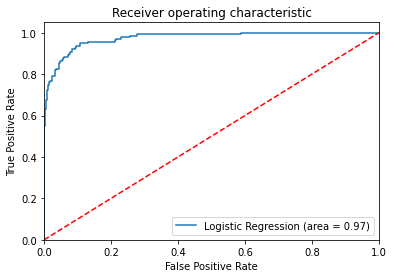

In [ ]:
#from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# *Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class.* (10 marks)

In [ ]:
# Find out coefficients of all the attributes and show the output in a data frame with column names 
X_train = pd.DataFrame(X_train, columns=['Age', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage', 'Family_2','Family_3', 'Family_4', 'Education_Graduate', 'Education_Undergrad','Securities Account_1', 'CD Account_1', 'Online_1', 'CreditCard_1'])
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
1,Income,8.43
2,ZIP Code,5.77
9,Education_Undergrad,2.88
11,CD Account_1,2.87
3,CCAvg,2.05
6,Family_3,1.14
7,Family_4,1.05
13,CreditCard_1,0.84
4,Mortgage,0.59
10,Securities Account_1,0.59


In [ ]:
#  For test data show all the rows where the predicted class is not equal to the observed class.
X_test = pd.DataFrame(X_test, columns=['Age','Income','ZIP Code','CCAvg','Mortgage','Family_2','Family_3','Family_4','Education_Graduate','Education_Undergrad','Securities Account_1','CD Account_1','Online_1','CreditCard_1'])
z = X_test.copy()
z['Observed Loan Status'] = y_test.values.astype('int64')
z['Predicted Loan Status'] = y_predict
z[z['Observed Loan Status'] !=  z['Predicted Loan Status']]

,Age,Income,ZIP Code,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Graduate,Education_Undergrad,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Loan Status,Predicted Loan Status
34,0.681818,0.495370,0.924940,0.050,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
63,0.704545,0.578704,0.961692,0.260,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
71,0.522727,0.587963,0.982643,0.410,0.335433,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
79,0.272727,0.888889,0.936527,0.300,0.721260,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
120,0.090909,0.750000,0.990463,0.470,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
121,0.454545,0.541667,0.948148,0.240,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
160,0.636364,0.717593,0.973141,0.130,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
178,0.431818,0.671296,0.969134,0.560,0.655118,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
201,0.431818,0.439815,0.939504,0.333,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,0
250,0.363636,0.393519,0.964554,0.360,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0


# *BONUS SECTION - make_classification()*

In [ ]:
#using make_classification() and threshold adjustment to improve Recall without having a negative effect on other metrics
X, Y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_features=14, n_samples=1000, random_state=10)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

logreg = LogisticRegression(random_state=4294967295,fit_intercept=False)
logreg.fit(X_train, y_train) 
#y_predict = logreg.predict(X_test) 

threshold = 0.10
y_predict = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)


Training accuracy 0.9776119402985075

Testing accuracy 0.9515151515151515

Recall: 0.9899328859060402

Precision: 0.9833333333333333

F1 Score: 0.9866220735785953

Roc Auc Score: 0.9526006711409396

Confusion Matrix


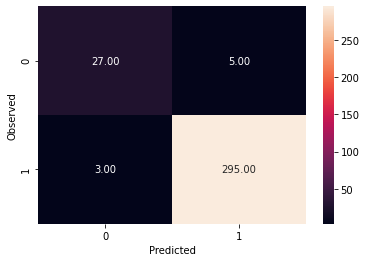

None


In [ ]:
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1] ))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

**Insights:** *Notice the improvement of all metrics including Recall. It's almost too good to be true. As a newbie, perhaps there's something that's negative here that I'm overlooking. For that reason, I would want to test this in a real world environment with minimal resources invested in this model until I can confirm the success. I look forward to discussing this in our mentor session to gain more insight on this method.*

# *Give conclusion related to the Business understanding of your model?* (5 marks)

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Correctly predicted that a liability customer would purchase a personal loan.

*False Positive (observed=0,predicted=1):*

Predicted that a liability customer would purchase a personal loan although they will NOT purchase a personal loan

*True Negative (observed=0,predicted=0):*

Correctly predicted that a liability customer would NOT purchase a personal loan.

*False Negative (observed=1,predicted=0):*

Predicted that a liability customer would NOT purchase a personal loan although they WILL purchase a personal loan

##### `Important Features`

"Income", "Zip Code", "Education", "CD Account", "CCVAvg" and "Family" seem to mostly influence the model's output based on the coefficients value.

Age has a low coefficint feature and doesn't seem to help the model in predicting target variable.


##### `Important Metric`

The bank wants to convert its liability customers to personal loan customers (while retaining them as depositors) while on a minimal marketing budget.

We want to minimize TRUE NEGATIVES. Recall will be the most important metric. However, since we're on a limited budget, we don't want to waste resources on FALSE POSITIVES

Therefore, I've submitted an alternative model using make_classification() that increases all metrics compared to the original model. More consideration is needed before deploying the alternative model. After the next mentor session, we will have a clear determination on the effectiveness of this model.